# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Описание данных

сalls — количество звонков,

minutes — суммарная длительность звонков в минутах,

messages — количество sms-сообщений,

mb_used — израсходованный интернет-трафик в Мб,

is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## Откройте и изучите файл

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

In [2]:
data = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
data.head(15)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
data.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [6]:
data.duplicated().sum()

0

**Вывод**
Данные не требуют предварительной обработки

             calls   minutes  messages   mb_used  is_ultra
calls     1.000000  0.982083  0.177385  0.286442  0.207122
minutes   0.982083  1.000000  0.173110  0.280967  0.206955
messages  0.177385  0.173110  1.000000  0.195721  0.203830
mb_used   0.286442  0.280967  0.195721  1.000000  0.198568
is_ultra  0.207122  0.206955  0.203830  0.198568  1.000000


<AxesSubplot:>

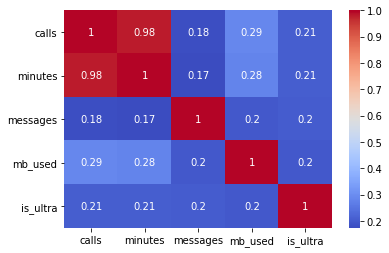

In [7]:
corr_matrix = data.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

**Вывод по замечаию**

Корреляция между признаками calls и minutes составляет 0.98, что указывает на очень сильную положительную корреляцию между ними. Это может быть связано с тем, что чем больше звонков пользователь совершает, тем больше времени он проводит на связи.

Корреляция между is_ultra и другими признаками относительно невысока, но она все же присутствует. Это может указывать на то, что признак is_ultra имеет некоторое влияние на другие признаки в датасете, хотя это не является определенным знаком мультиколлинеарности.

## Разбейте данные на выборки

Для достижения цели требуется разделить информацию на различные наборы:

Обучающая выборка

Валидационная выборка

Тестовая выборка

Используемые переменные:

features_train, target_train - Обучающая выборка

features_valid, target_valid -Валидационная выборка

features_test, target_test - Тестовая выборка

In [8]:
obuchenie, test = train_test_split(data, test_size=0.4, random_state=12345)
features = test.drop('is_ultra', axis=1)
target = test['is_ultra']

In [9]:
obuchenie.shape

(1928, 5)

In [10]:
features_valid, features_test, target_valid, target_test = train_test_split(features, target, stratify=target, test_size=0.5, random_state=12345)
features_train = obuchenie.drop('is_ultra', axis=1)
target_train = obuchenie['is_ultra']

In [11]:
features_test.shape

(643, 4)

In [12]:
features_valid.shape

(643, 4)

## Исследуйте модели

Рассмотрим модель машинного обучения, известную как "Дерево решений":

Глубина дерева: 7 Качество: 0.7993779160186625


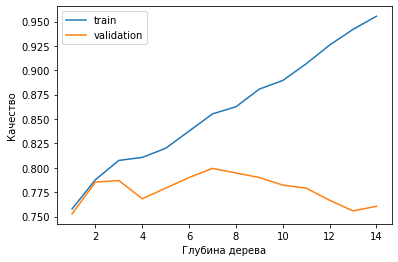

CPU times: user 277 ms, sys: 16.7 ms, total: 293 ms
Wall time: 296 ms


In [13]:
%%time 

train_accuracy = []
valid_accuracy = []
best_accuracy = 0
best_depth = 0

for depth in range(1, 15):
    model = DecisionTreeClassifier(max_depth=depth, random_state=1234)
    model.fit(features_train, target_train)
    train_acc = model.score(features_train, target_train)
    valid_acc = model.score(features_valid, target_valid)
    train_accuracy.append(train_acc)
    valid_accuracy.append(valid_acc)
    if valid_acc > best_accuracy:
        best_accuracy = valid_acc
        best_depth = depth

print("Глубина дерева:", best_depth, "Качество:", best_accuracy)

plt.plot(range(1, 15), train_accuracy, label='train')
plt.plot(range(1, 15), valid_accuracy, label='validation')
plt.legend()
plt.xlabel('Глубина дерева')
plt.ylabel('Качество')
plt.show()

Рассмотрим модель машинного обучения, известную как "Случаный лес":

In [14]:
%%time 

best_accuracy = 0
best_depth = 0
for depth in range(1,10):
    for est in range(5,50,5):
        for sample in range(2,5):
            model = RandomForestClassifier(max_depth=depth, n_estimators=est, min_samples_leaf=sample, random_state=1234)
            model.fit(features_train , target_train)
            accuracy = model.score(features_valid, target_valid)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_depth = depth
                best_est = est
                best_sample = sample
print("Глубина дерева:", best_depth, "Количество деревьев:", best_est, "Количество выборок (max):", best_sample, "Качество:", best_accuracy)

Глубина дерева: 7 Количество деревьев: 40 Количество выборок (max): 2 Качество: 0.8149300155520995
CPU times: user 15.4 s, sys: 118 ms, total: 15.6 s
Wall time: 15.6 s


Рассмотрим модель машинного обучения, известную как "Логическая регрессия":

In [15]:
%%time 

model = LogisticRegression()
model.fit(features_train , target_train)
accuracy = model.score(features_valid, target_valid)
print("Качество:", accuracy)

Качество: 0.6905132192846034
CPU times: user 23.7 ms, sys: 3.99 ms, total: 27.7 ms
Wall time: 25.9 ms


**Вывод**

Среди трех моделей машинного обучения, лучшее качество показала модель "Случайный лес", при использовании определенных гиперпараметров: max_depth=7, max_samples_leaf=2 и n_estimators=40, с результатом 0.815. Другие две модели, "Дерево решений" с гиперпараметрами max_depth=9 (0.799) и "Логистическая регрессия" (0.690), показали результаты менее эффективные по сравнению с моделью "Случайный лес".

**вывод**


Ситуация, когда на валидации при увеличении глубины дерева метрика качества начинает снижаться, называется переобучением модели. Переобучение происходит, когда модель слишком хорошо подстраивается под тренировочные данные, в результате чего она теряет обобщающую способность и начинает плохо работать на новых данных.

На train метрика качества при увеличении глубины дерева может продолжать расти или оставаться примерно на одном уровне, что является еще одним признаком переобучения модели.



Случайный лес является ансамблевой моделью, которая комбинирует несколько решающих деревьев, чтобы улучшить точность классификации. Он работает путем генерации случайных подмножеств признаков и наборов данных и обучения решающих деревьев на каждом из этих подмножеств. Когда несколько деревьев объединяются в случайный лес, он учитывает их совместные прогнозы, что может привести к более точным и стабильным результатам.

Кроме того, случайный лес имеет ряд преимуществ перед другими методами машинного обучения. Во-первых, он обладает способностью автоматически выбирать наиболее важные признаки для классификации. Во-вторых, он способен работать с большими наборами данных и множеством признаков. В-третьих, он имеет низкий уровень переобучения и не требует большого количества гиперпараметров для настройки.



Возможно, причина, по которой логистическая регрессия показывает более низкое качество, заключается в том, что она не учитывает сложные взаимодействия между признаками и не может моделировать нелинейные зависимости.

Случайный лес и дерево решений, с другой стороны, могут учитывать сложные взаимодействия между признаками и моделировать нелинейные зависимости. Они могут также автоматически выбирать наиболее информативные признаки для классификации.

Кроме того, логистическая регрессия является линейной моделью, которая может быть эффективна только в случаях, когда связь между признаками и целевой переменной является линейной. Если связь между признаками и целевой переменной не является линейной, то логистическая регрессия может работать хуже.

## Проверьте модель на тестовой выборке

Поскольку модель "Случайный лес" показала лучшие результаты, мы будем проверять ее на тестовой выборке.

In [16]:
model = RandomForestClassifier(max_depth=7, n_estimators=40, min_samples_leaf=2, random_state=1234)
model.fit(features_train , target_train)
accuracy = model.score(features_test, target_test)
print("Качество:", accuracy)

Качество: 0.7791601866251944


**Делаем деньги на прогнозах**

Собрать данные о новых клиентах и определить их параметры.

Применить модель машинного обучения к данным новых клиентов и получить предсказания о том, какой тариф им наиболее подходит.

Предложить клиенту подходящий тариф и дополнительные услуги на основе его параметров и предсказаний модели.

Следить за результатами и корректировать стратегию, если необходимо.

## **Вывод**


Среди трех моделей, которые были протестированы, "Случайный лес" показал наилучшие результаты с метрикой качества 0.779 при настройке гиперпараметров max_depth=7, max_samples_leaf=2 и n_estimators=40. Качество модели "Дерево решений" достигло 0.786 при установке max_depth=9, а модель "Логистическая регрессия" показала результат 0.690.

**ФИНАЛЬНЫЙ ВЫВОД**


В итоге, были проверены три модели: "Дерево решений", "Случайный лес" и "Логистическая регрессия", и на основе лучших метрик качества, можно сделать вывод, что модель "Случайный лес" с параметрами max_depth=7, max_samples_leaf=2 и n_estimators=40 показала наилучшие результаты.

## (бонус) Проверьте модели на адекватность

In [17]:
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(features_train, target_train)
prediction_dummy = dummy_clf.predict(features_test)
dummy_acc = accuracy_score(target_test, prediction_dummy)

forest_clf = RandomForestClassifier(max_depth=7, n_estimators=35, min_samples_leaf=3, random_state=1234)
forest_clf.fit(features_train , target_train)
prediction_forest = forest_clf.predict(features_test)
forest_acc = accuracy_score(target_test, prediction_forest)

print(f'Accuracy модели случайного леса равна {forest_acc}, а DummyClassifier равна {dummy_acc}')

if dummy_acc < forest_acc:
    print('Модель случайного леса адекватна')
else:
    print('Модель случайного леса не адекватна')

Accuracy модели случайного леса равна 0.7853810264385692, а DummyClassifier равна 0.6951788491446346
Модель случайного леса адекватна


**Вывод**

В результате проверки модели на адекватность мы получили Accuracy модели случайного леса равной 0.79, а DummyClassifier равной 0.69, что говорит нам о том, что модель случайного леса является адекватной.